In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

(0) Load

In [2]:
file = '/Users/robertpinochetgomez/GitHub/01-linear-regression/01-datasets/babies.csv'

df_babies = pd.read_csv(file)
df_babies['mother_weight_kg'] = df_babies['weight'] / 2.205
df_babies['mother_height_cm'] = df_babies['height'] * 2.54
df_babies['baby_bwt_kg'] = df_babies['bwt'] / 35.274
df_babies = df_babies.drop(columns=['weight', 'height', 'bwt', 'case']).rename(columns={'age': 'mother_age', 'gestation': 'mother_gestation_days'})

print(df_babies.info())
df_babies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mother_gestation_days  1223 non-null   float64
 1   parity                 1236 non-null   int64  
 2   mother_age             1234 non-null   float64
 3   smoke                  1226 non-null   float64
 4   mother_weight_kg       1200 non-null   float64
 5   mother_height_cm       1214 non-null   float64
 6   baby_bwt_kg            1236 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 67.7 KB
None


,mother_gestation_days,parity,mother_age,smoke,mother_weight_kg,mother_height_cm,baby_bwt_kg
0,284.0,0,27.0,0.0,45.351474,157.48,3.401939
1,282.0,0,33.0,0.0,61.224490,162.56,3.203493
2,279.0,0,28.0,1.0,52.154195,162.56,3.628735
3,NaN,0,36.0,0.0,86.167800,175.26,3.486988
4,282.0,0,23.0,1.0,56.689342,170.18,3.061745


(1) Exploratory Analysis

- Distribution & Boxplot & Relationships

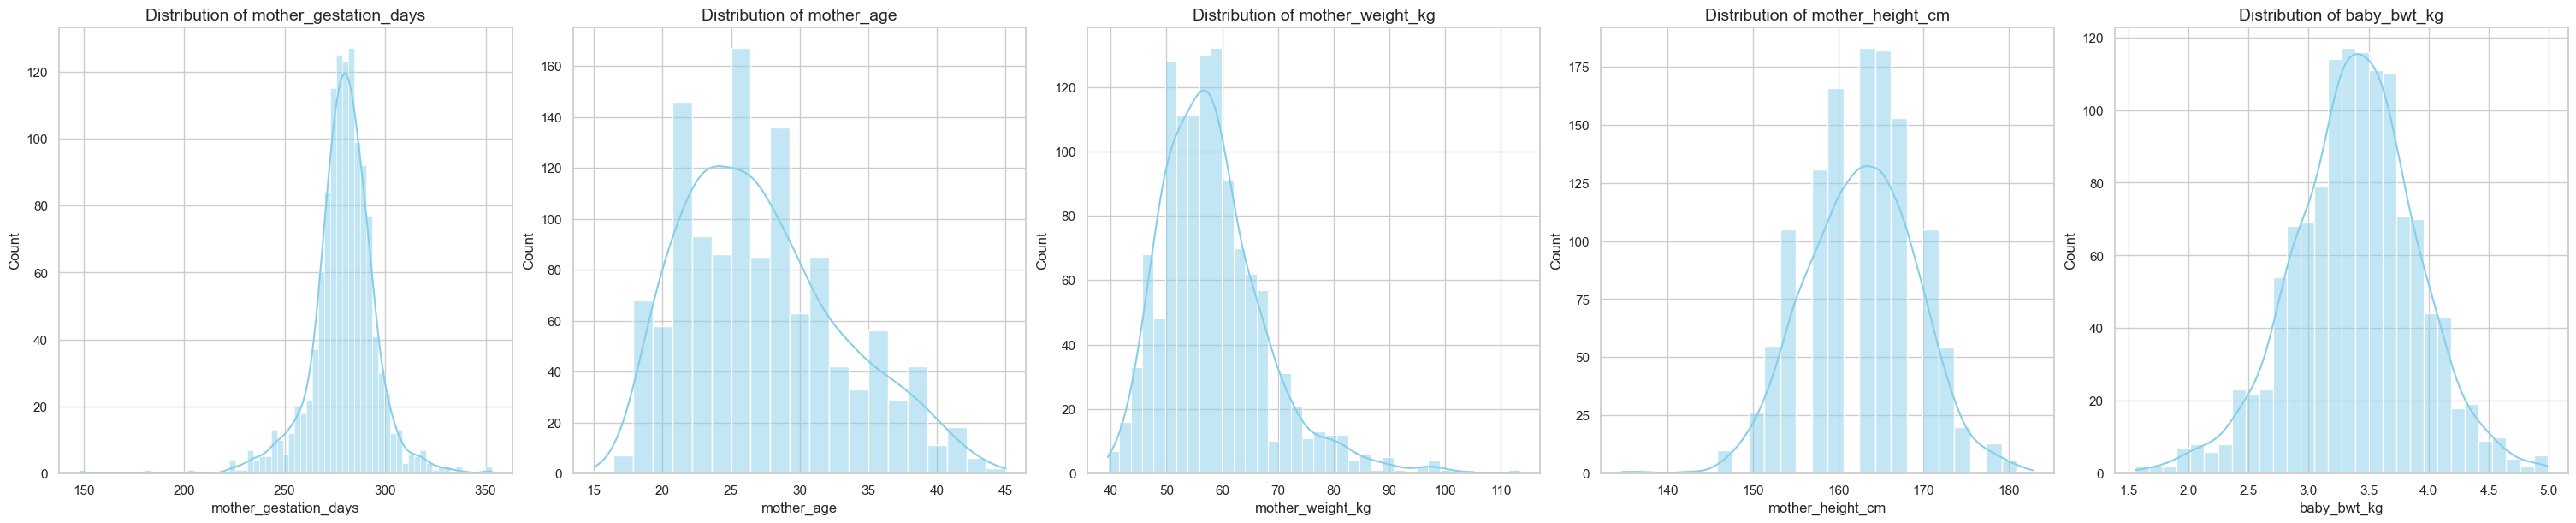

In [3]:
# histograms
variables = ['mother_gestation_days', 'mother_age', 'mother_weight_kg', 'mother_height_cm', 'baby_bwt_kg']

sns.set(style="whitegrid")

n_vars = len(variables)
fig, axes = plt.subplots(1, n_vars, figsize=(6 * n_vars, 6), constrained_layout=True)

for i, var in enumerate(variables):
    sns.histplot(data=df_babies, x=var, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.show()

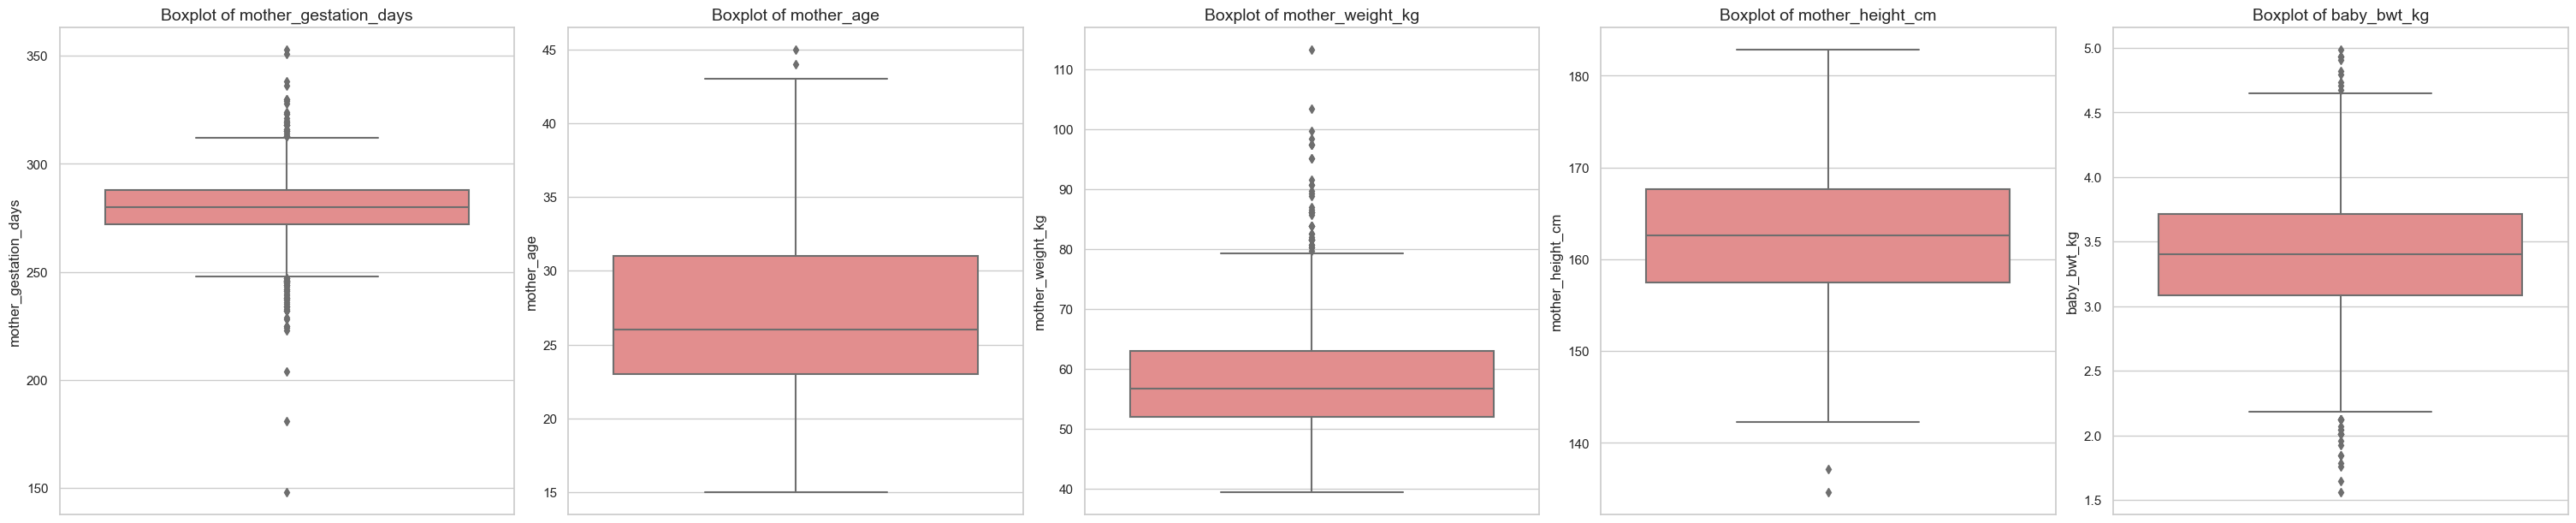

In [4]:
# boxplots
variables = ['mother_gestation_days', 'mother_age', 'mother_weight_kg', 'mother_height_cm', 'baby_bwt_kg']

sns.set(style="whitegrid")

n_vars = len(variables)
fig, axes = plt.subplots(1, n_vars, figsize=(6 * n_vars, 6), constrained_layout=True)

for i, var in enumerate(variables):
    sns.boxplot(data=df_babies, y=var, ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot of {var}', fontsize=14)
    axes[i].set_ylabel(var, fontsize=12)

plt.show()

- Relationship between birthweight and all other variables

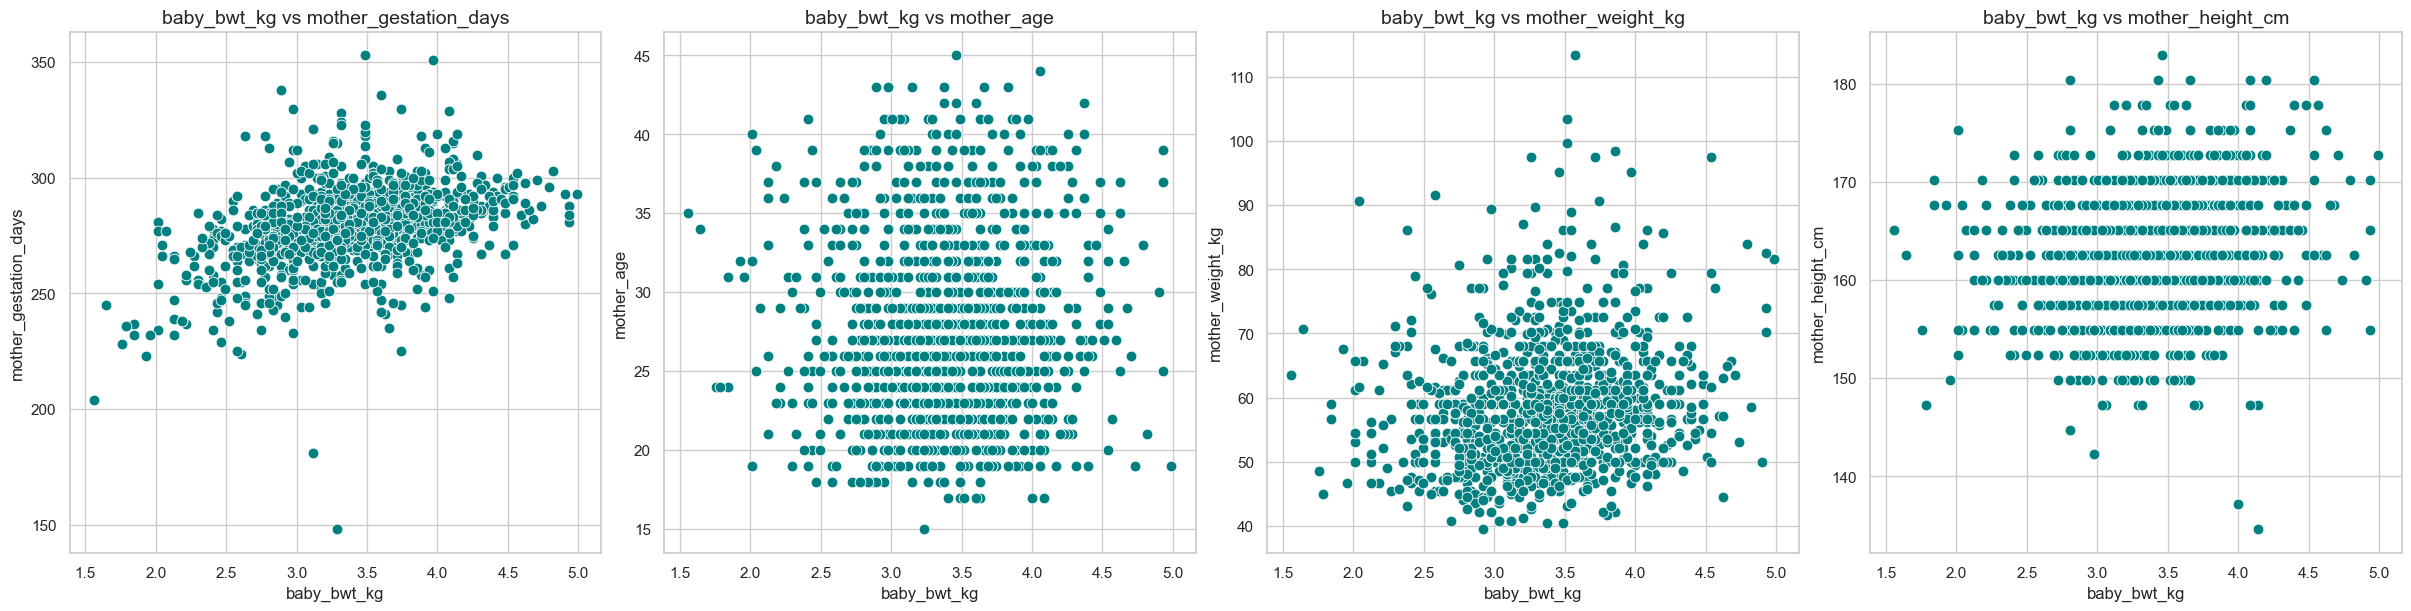

In [5]:
# Variables to compare against baby_bwt_kg
independent_vars = ['mother_gestation_days', 'mother_age', 'mother_weight_kg', 'mother_height_cm']
target = 'baby_bwt_kg'

sns.set(style="whitegrid")

n_vars = len(independent_vars)
fig, axes = plt.subplots(1, n_vars, figsize=(6 * n_vars, 6), constrained_layout=True)

# Plot each scatterplot
for i, var in enumerate(independent_vars):
    sns.scatterplot(data=df_babies, x=target, y=var, ax=axes[i], color='teal', edgecolor='white', s=60)
    axes[i].set_title(f'{target} vs {var}', fontsize=14)
    axes[i].set_xlabel(target, fontsize=12)
    axes[i].set_ylabel(var, fontsize=12)

plt.show()

En base a las principales variables numéricas, podemos decir que:
- Días de gestación: La media es de 279 días, con una desviación de 16 días entre toda la muestra. En donde, la mayor parte de los casos ronda entre los 272 a 288 días.
- Edad de la madre: La mediana de edad es 26 años, con una desviación estándar de 6 años entre toda la muestra. En donde la mayor parte de los casos, ronda entre los 23 y 31 años. 
- Peso de las madres: La mediana es de 57 kg, con una desviación estándar de 10 kgs entre toda la muestra. En donde la mayor parte de los casos, ronda entre los 52 a los 63 kg.
- Altura de las madres: La media es 163 cm, con una desviación estándar de 6 cm entre toda la muestra. En donde la mayor parte de los casos, ronda entre los 157 a los 168 cm. 
- Peso del bebé al nacer: La media es de 3.4 kg, con una desviación estándar de 0.5 kg entre toda la muestra. En donde la mayor parte de los casos, ronda entre los 3 a los 3.7 kgs. 

Sobre las relaciones, se ve que el peso de nacimiento aumenta a medida que se tienen más días de gestación. Y a través del gráfico se ve una relación de no muy fuerte de que a más peso de la madre, se tenga una mayor peso del bebé. Y sobre la altura, se ve una tendencia al aumento, pero no tan fuerte, ya que las alturas de las madres de la muestra igual posee casi todo el rango de pesos. Efecto muy parecido con la edad.

(2) Exploratory Analysis w/o Outliers (IQR technique)

In [6]:
# remove outliers
variables = ['mother_gestation_days', 'mother_age', 
             'mother_weight_kg', 'mother_height_cm', 'baby_bwt_kg']

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_babies_clean = remove_outliers_iqr(df_babies, variables)

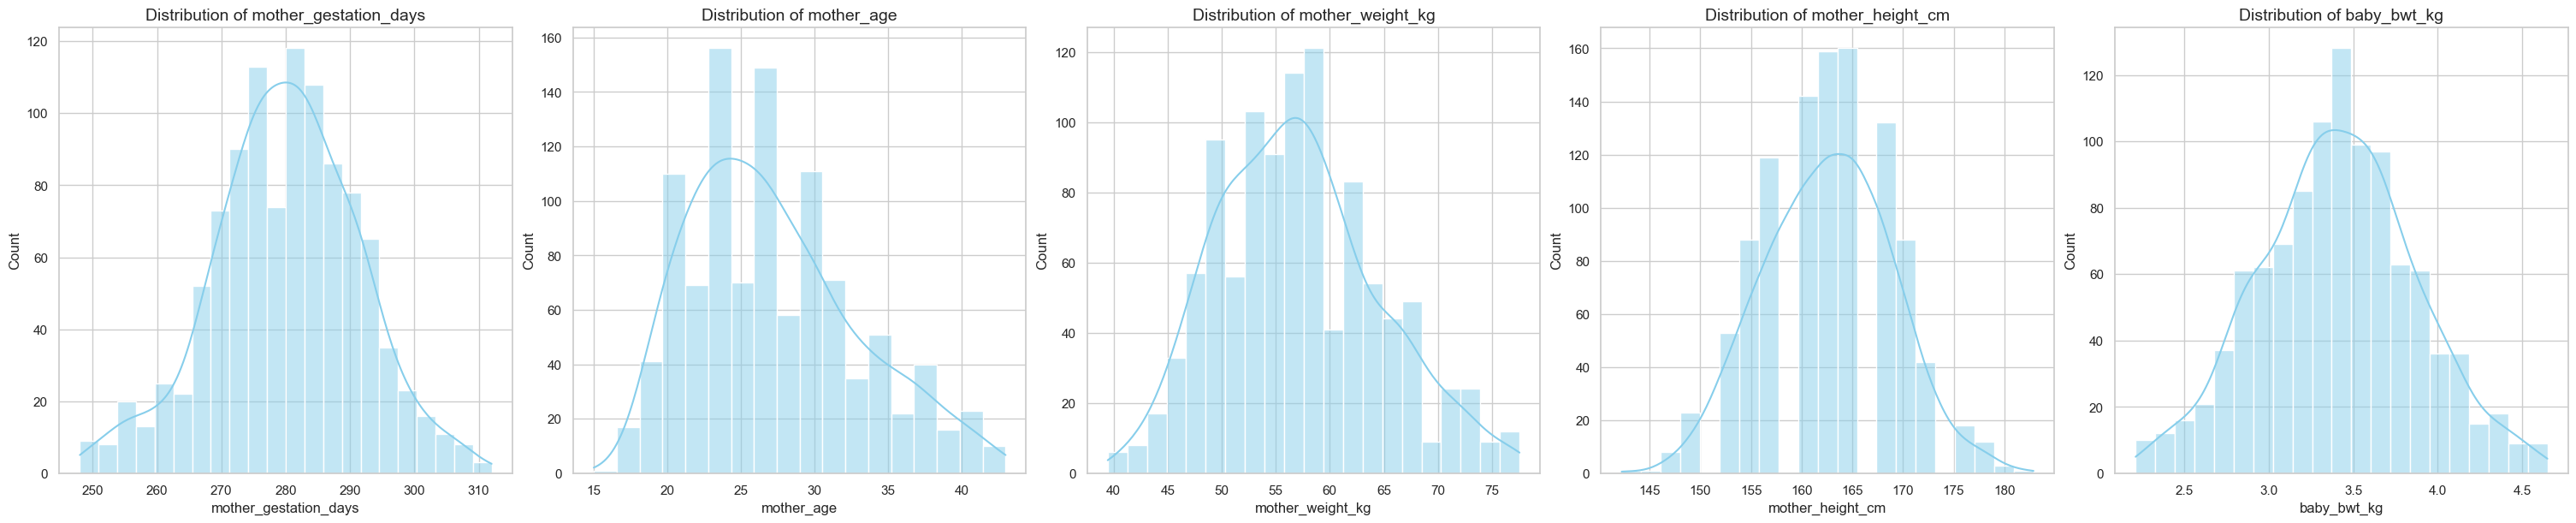

In [7]:
# histograms
variables = ['mother_gestation_days', 'mother_age', 'mother_weight_kg', 'mother_height_cm', 'baby_bwt_kg']

sns.set(style="whitegrid")

n_vars = len(variables)
fig, axes = plt.subplots(1, n_vars, figsize=(6 * n_vars, 6), constrained_layout=True)

for i, var in enumerate(variables):
    sns.histplot(data=df_babies_clean, x=var, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.show()

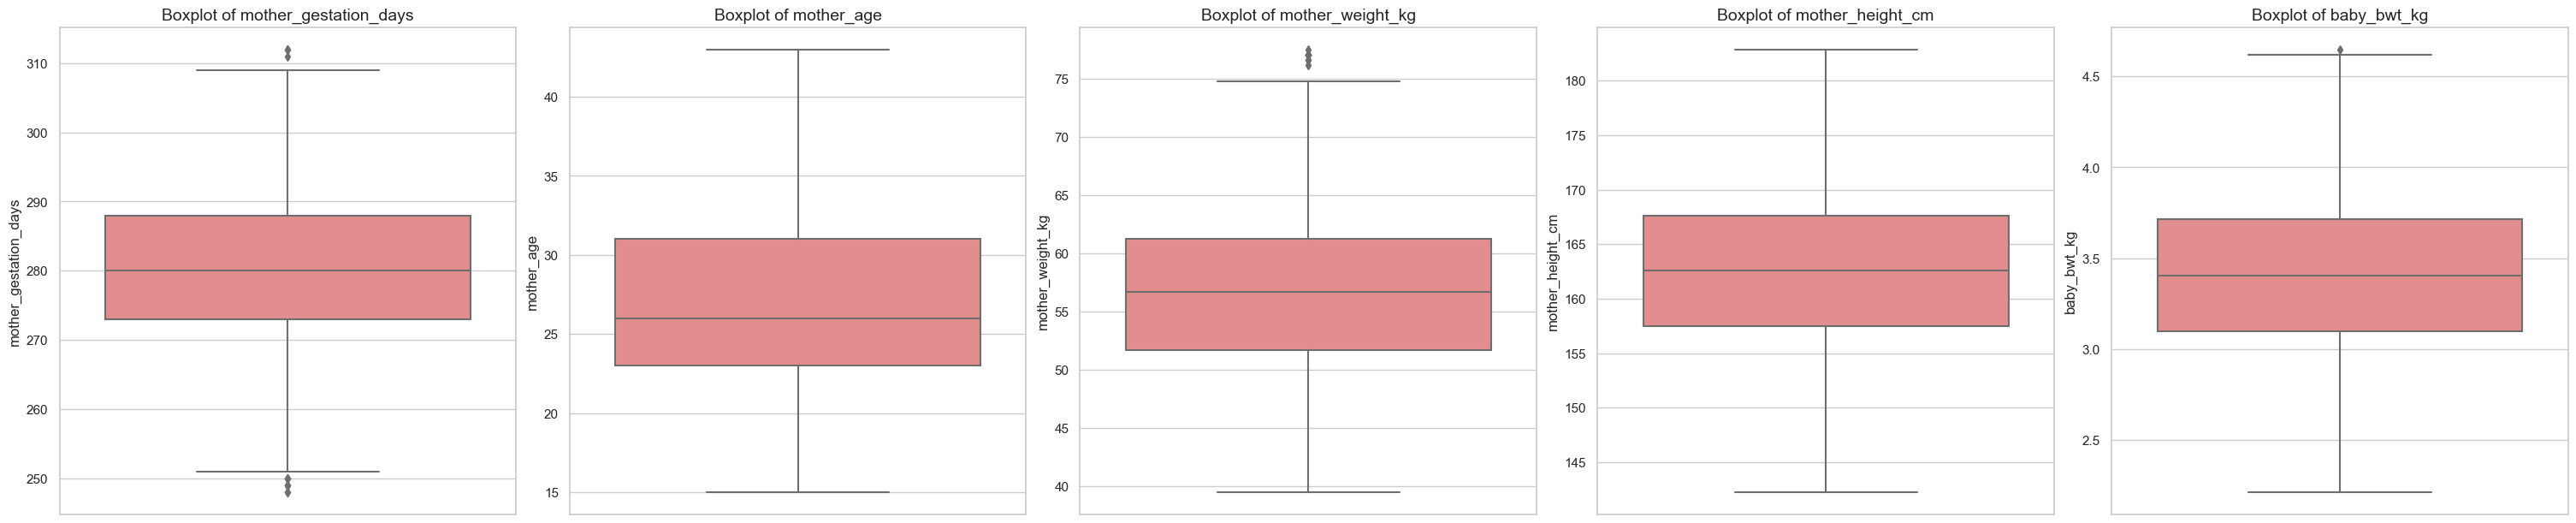

In [8]:
# boxplots
variables = ['mother_gestation_days', 'mother_age', 'mother_weight_kg', 'mother_height_cm', 'baby_bwt_kg']

sns.set(style="whitegrid")

n_vars = len(variables)
fig, axes = plt.subplots(1, n_vars, figsize=(6 * n_vars, 6), constrained_layout=True)

for i, var in enumerate(variables):
    sns.boxplot(data=df_babies_clean, y=var, ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot of {var}', fontsize=14)
    axes[i].set_ylabel(var, fontsize=12)

plt.show()

- Relationship between birthweight and all other variables

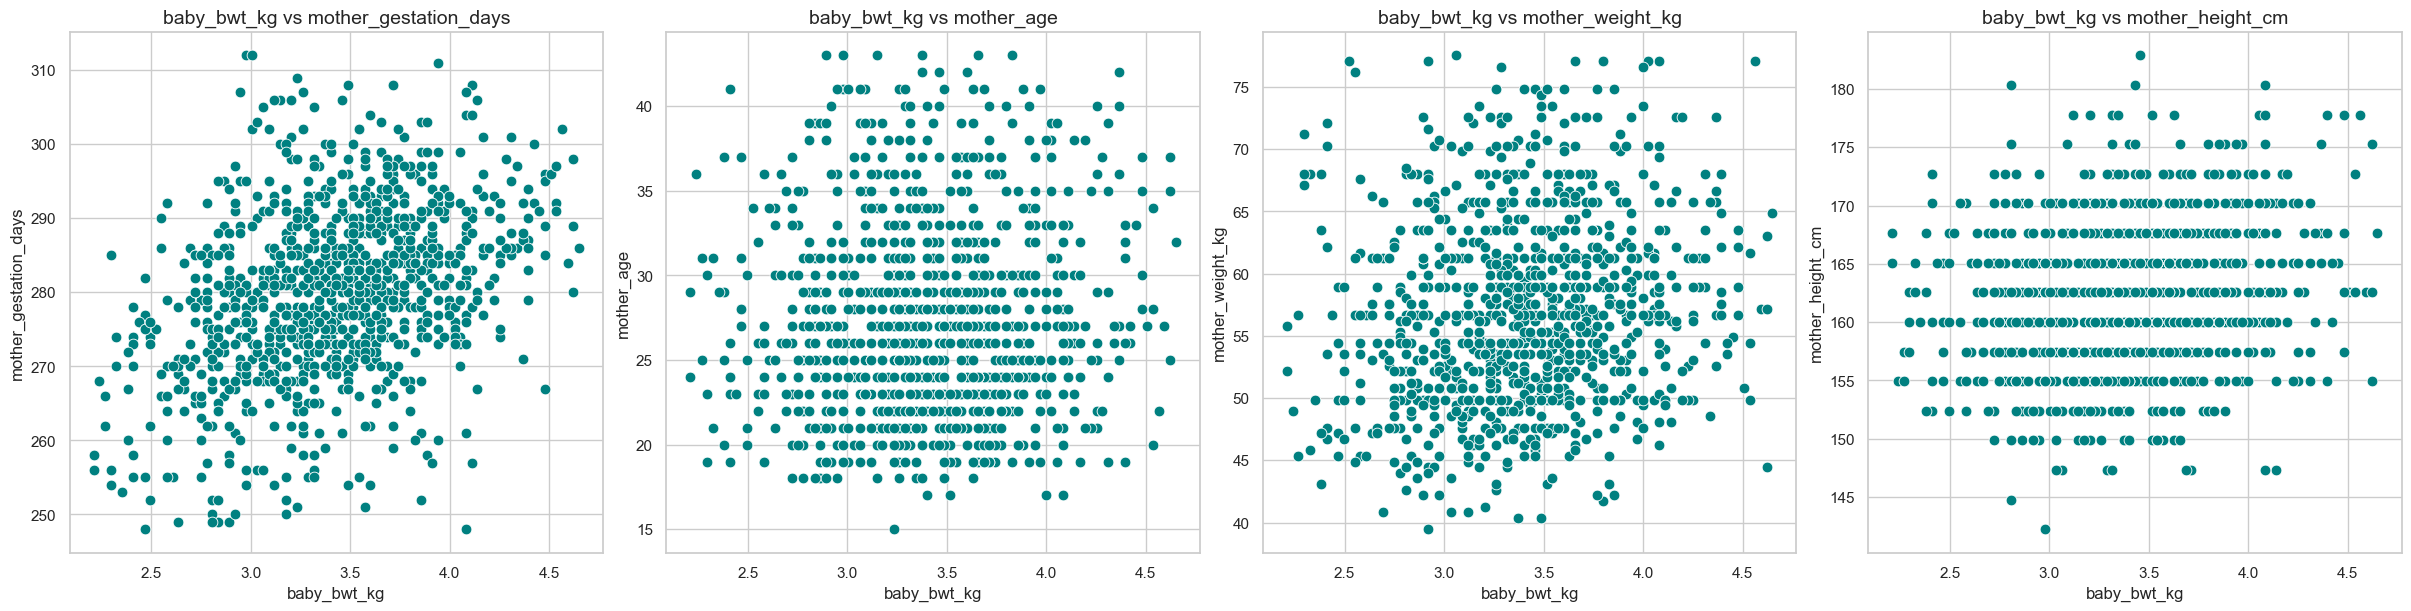

In [9]:
# Variables to compare against baby_bwt_kg
independent_vars = ['mother_gestation_days', 'mother_age', 'mother_weight_kg', 'mother_height_cm']
target = 'baby_bwt_kg'

sns.set(style="whitegrid")

n_vars = len(independent_vars)
fig, axes = plt.subplots(1, n_vars, figsize=(6 * n_vars, 6), constrained_layout=True)

# Plot each scatterplot
for i, var in enumerate(independent_vars):
    sns.scatterplot(data=df_babies_clean, x=target, y=var, ax=axes[i], color='teal', edgecolor='white', s=60)
    axes[i].set_title(f'{target} vs {var}', fontsize=14)
    axes[i].set_xlabel(target, fontsize=12)
    axes[i].set_ylabel(var, fontsize=12)

plt.show()

Las conclusiones son las medidas, solo que ahora se atenúan un poco más. Interesante que la edad y la altura no definan el peso de un bebé. 

- Correlation Heatmap

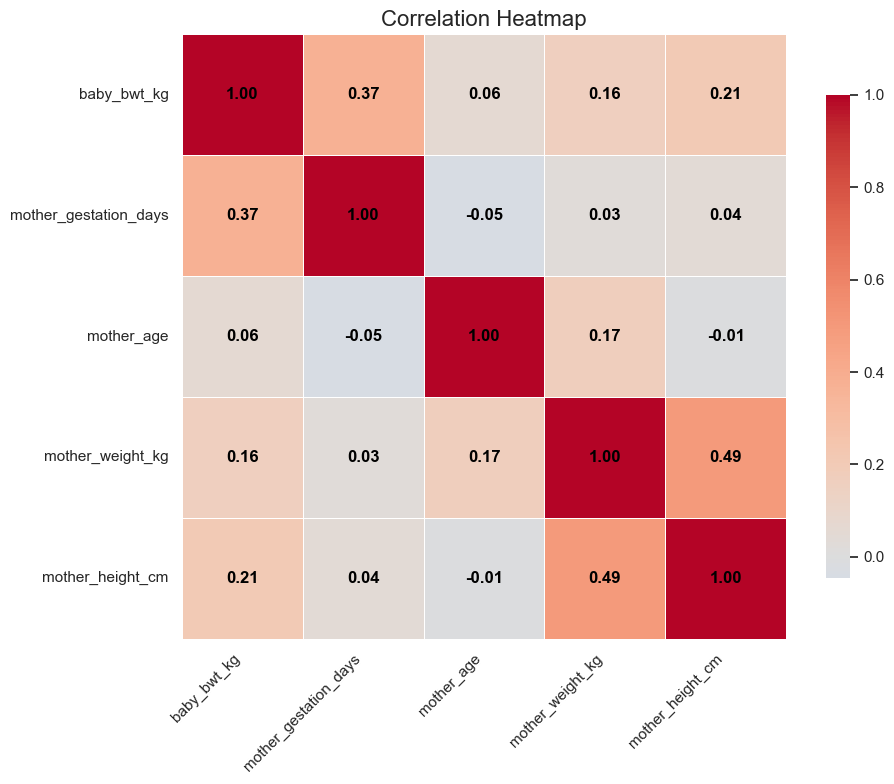

In [10]:
vars_corr = ['baby_bwt_kg', 'mother_gestation_days', 'mother_age', 'mother_weight_kg', 'mother_height_cm']
corr = df_babies_clean[vars_corr].corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        value = corr.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f"{value:.2f}",
                ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(np.arange(len(corr.columns)) + 0.5, corr.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(corr.index)) + 0.5, corr.index, rotation=0)
plt.tight_layout()
plt.show()

El gráfico de correlaciones nos habla de los mismo. 

(99) Export

In [13]:
path = '/Users/robertpinochetgomez/GitHub/01-linear-regression/01-datasets'

df_babies.to_parquet(f'{path}/df_babies_raw.parquet')
df_babies_clean.to_parquet(f'{path}/df_babies_no_outliers.parquet')